# Projeto 2 - análise de dados
### Turismo mundial

In [4]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sns; sns.set()
import statsmodels.api as sm
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor

In [5]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\AnnaBeatriz\INSPER\2020.1\cdados\Projeto-2


In [6]:
dados_turismo = pd.read_excel('Dados_turismo.xlsx',thousands=",")
dados_turismo = dados_turismo.set_index('Country')
dados_turismo.head()

,int inbound 2012,int inbound 2018,int outbound 2012,int outbound 2018,inbound exp 2012 (millions),inbound exp 2018 (millions),inbound exp 2012 (percentage),inbound exp 2018 (percentage),outbound exp 2012 (millions),outbound exp 2018 (millions),outbound exp 2012 (percentage),outbound exp 2018 (percentage)
Country,,,,,,,,,,,,
Afghanistan,NaN,NaN,NaN,NaN,167.0,50.0,7.2,3.1,110.0,226.0,1.1,2.8
Albania,3156.0,534.0,3959.0,5415.0,1623.0,2306.0,45.6,48.2,1374.0,175.0,23.5,25.5
Algeria,2634.0,2657.0,1911.0,561.0,295.0,NaN,0.4,NaN,598.0,NaN,1.0,NaN
American Samoa,23.0,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Andorra,2238.0,3042.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
dados_bio = pd.read_excel('Dados_bio.xlsx')
dados_bio = dados_bio.sort_values('Country')
dados_bio.loc[:,'Country'] = dados_bio.loc[:,'Country'].str.strip()
dados_bio = dados_bio.set_index('Country')
dados_bio.head()

,Bare area,Cropland,Tree cover,Grassland,Shrubland,Sparse vegetation,Artificial surfaces,Inland water,Wetland
Country,,,,,,,,,
Afghanistan,39.1,12.2,1.2,37.3,3.5,6.3,0.1,0.1,0.0
Albania,1.8,49.8,34.8,5.5,3.2,1.4,1.0,2.3,0.3
Algeria,90.1,4.6,0.9,0.0,0.7,3.5,0.1,0.1,0.0
American Samoa,0.0,53.0,32.2,0.0,0.0,0.1,0.2,14.6,0.0
Andorra,4.6,1.0,59.0,23.7,0.0,10.8,0.8,0.0,0.0


In [8]:
dados = dados_turismo.merge(dados_bio, left_index=True, right_index=True)
dados

,int inbound 2012,int inbound 2018,int outbound 2012,int outbound 2018,inbound exp 2012 (millions),inbound exp 2018 (millions),inbound exp 2012 (percentage),inbound exp 2018 (percentage),outbound exp 2012 (millions),outbound exp 2018 (millions),...,outbound exp 2018 (percentage),Bare area,Cropland,Tree cover,Grassland,Shrubland,Sparse vegetation,Artificial surfaces,Inland water,Wetland
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,NaN,NaN,167.0,50.0,7.2,3.1,110.0,226.0,...,2.8,39.1,12.2,1.2,37.3,3.5,6.3,0.1,0.1,0.0
Albania,3156.0,534.0,3959.0,5415.0,1623.0,2306.0,45.6,48.2,1374.0,175.0,...,25.5,1.8,49.8,34.8,5.5,3.2,1.4,1.0,2.3,0.3
Algeria,2634.0,2657.0,1911.0,561.0,295.0,NaN,0.4,NaN,598.0,NaN,...,NaN,90.1,4.6,0.9,0.0,0.7,3.5,0.1,0.1,0.0
American Samoa,23.0,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,53.0,32.2,0.0,0.0,0.1,0.2,14.6,0.0
Andorra,2238.0,3042.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,4.6,1.0,59.0,23.7,0.0,10.8,0.8,0.0,0.0
Angola,528.0,218.0,NaN,NaN,711.0,557.0,1.0,1.3,288.0,762.0,...,2.9,2.4,5.8,59.9,13.2,17.7,0.0,0.1,0.2,0.6
Antigua and Barbuda,247.0,269.0,NaN,NaN,319.0,971.0,58.9,84.3,49.0,113.0,...,10.1,0.0,3.5,36.8,28.0,0.3,0.0,2.6,20.6,8.0
Argentina,6497.0,6942.0,7266.0,1113.0,5665.0,5999.0,6.0,7.8,8466.0,13092.0,...,15.1,4.8,23.4,13.1,3.0,33.7,16.9,0.2,1.5,3.3
Armenia,963.0,1652.0,965.0,1623.0,853.0,1237.0,29.2,26.3,874.0,1458.0,...,21.9,1.3,56.9,20.1,11.2,2.4,1.4,2.2,4.5,0.0


In [9]:
dados.describe()

,int inbound 2012,int inbound 2018,int outbound 2012,int outbound 2018,inbound exp 2012 (millions),inbound exp 2018 (millions),inbound exp 2012 (percentage),inbound exp 2018 (percentage),outbound exp 2012 (millions),outbound exp 2018 (millions),...,outbound exp 2018 (percentage),Bare area,Cropland,Tree cover,Grassland,Shrubland,Sparse vegetation,Artificial surfaces,Inland water,Wetland
count,1.710000e+02,1.520000e+02,9.300000e+01,8.500000e+01,1.650000e+02,1.510000e+02,160.000000,146.000000,1.660000e+02,1.490000e+02,...,147.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000
mean,1.039785e+04,1.698376e+04,1.918390e+04,2.759107e+04,1.383290e+04,1.876917e+04,15.145625,18.154795,1.230922e+04,1.760962e+04,...,7.019048,11.561622,27.953514,33.416216,8.963784,5.942162,2.839459,2.323784,5.868649,1.120000
std,8.199656e+04,1.172879e+05,1.222651e+05,1.695197e+05,1.005099e+05,1.356294e+05,17.521806,20.787775,9.093006e+04,1.299831e+05,...,4.823293,24.973899,21.509333,27.458903,14.127788,11.632038,6.134614,5.940537,13.122926,2.978525
min,1.000000e+00,3.000000e+00,1.500000e+01,2.900000e+01,2.000000e+00,4.000000e+00,0.000000,0.200000,2.000000e+00,4.000000e+00,...,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.450000e+02,4.455000e+02,4.930000e+02,8.360000e+02,2.150000e+02,5.120000e+02,3.900000,4.450000,1.335000e+02,2.820000e+02,...,3.850000,0.000000,8.600000,7.800000,0.200000,0.000000,0.000000,0.200000,0.700000,0.000000
50%,1.006000e+03,1.848500e+03,1.816000e+03,2.486000e+03,9.060000e+02,1.921000e+03,7.250000,9.350000,5.945000e+02,9.600000e+02,...,5.900000,0.100000,23.400000,31.800000,3.700000,0.500000,0.100000,0.500000,1.800000,0.100000
75%,3.873000e+03,7.450750e+03,7.454000e+03,9.966000e+03,4.687000e+03,6.123500e+03,19.100000,22.625000,2.917250e+03,5.625000e+03,...,9.100000,4.400000,43.300000,57.700000,11.200000,6.100000,2.800000,1.700000,4.700000,0.700000
max,1.070183e+06,1.441953e+06,1.179078e+06,1.563556e+06,1.275118e+06,1.649264e+06,82.800000,95.200000,1.160710e+06,1.575316e+06,...,25.500000,96.000000,84.700000,96.300000,84.200000,76.900000,36.600000,49.000000,89.400000,29.900000


In [10]:
correlacao = dados.corr()
correlacao.head()

,int inbound 2012,int inbound 2018,int outbound 2012,int outbound 2018,inbound exp 2012 (millions),inbound exp 2018 (millions),inbound exp 2012 (percentage),inbound exp 2018 (percentage),outbound exp 2012 (millions),outbound exp 2018 (millions),...,outbound exp 2018 (percentage),Bare area,Cropland,Tree cover,Grassland,Shrubland,Sparse vegetation,Artificial surfaces,Inland water,Wetland
int inbound 2012,1.000000,0.997299,0.996316,0.996803,0.993065,0.991414,-0.058594,-0.064620,0.992698,0.993763,...,-0.018318,0.043124,-0.028733,-0.019300,0.005920,0.028136,0.054935,-0.018810,-0.032058,-0.002557
int inbound 2018,0.997299,1.000000,0.994951,0.995263,0.993312,0.991817,-0.072996,-0.082862,0.992574,0.992987,...,-0.028680,0.044819,-0.019286,-0.026023,0.008397,0.043383,0.047176,-0.022813,-0.040396,-0.006293
int outbound 2012,0.996316,0.994951,1.000000,0.999656,0.991404,0.990110,-0.078346,-0.087442,0.996787,0.996983,...,0.005002,0.065452,-0.081433,-0.031029,0.023110,0.082103,0.054566,-0.025519,-0.026448,0.012217
int outbound 2018,0.996803,0.995263,0.999656,1.000000,0.992269,0.991143,-0.079509,-0.090535,0.996997,0.997236,...,-0.006978,0.052438,-0.073373,-0.029406,0.027756,0.083167,0.049473,-0.032254,-0.028765,0.012452
inbound exp 2012 (millions),0.993065,0.993312,0.991404,0.992269,1.000000,0.997387,-0.060169,-0.067037,0.995508,0.996655,...,-0.019735,0.027149,-0.024585,-0.025018,0.027096,0.031340,0.060020,-0.009216,-0.033629,0.005396


In [11]:
dados.dtypes

int inbound 2012                   float64
int inbound 2018                   float64
int outbound 2012                  float64
int outbound 2018                  float64
inbound exp 2012  (millions)       float64
inbound exp 2018  (millions)       float64
inbound exp 2012  (percentage)     float64
inbound exp 2018  (percentage)     float64
outbound exp 2012  (millions)      float64
outbound exp 2018  (millions)      float64
outbound exp 2012  (percentage)    float64
outbound exp 2018  (percentage)    float64
Bare area                          float64
Cropland                           float64
Tree cover                         float64
Grassland                          float64
Shrubland                          float64
Sparse vegetation                  float64
Artificial surfaces                float64
Inland water                       float64
Wetland                            float64
dtype: object

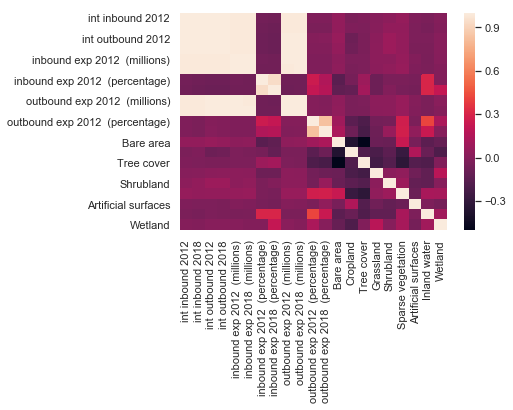

In [12]:
grafico = sns.heatmap(correlacao)

In [13]:
def regress(X,Y):
    '''
    X: coluna(s) do DataFrame que serão utilizadas como variável(is) preditoras/explicativas (independente(s))
    Y: coluna do DataFrame que será utilizada como variável resposta (dependente)
    '''
    X_cp = sm.add_constant(X)
    model = sm.OLS(Y,X_cp)
    results = model.fit()
    return results

In [14]:
#dropna tira as linhas que tem o NaN
dados_completos = dados.dropna()

X = dados_completos[['int inbound 2012', 'int outbound 2012',
       'int outbound 2018', 'inbound exp 2012  (millions)',
       'inbound exp 2018  (millions)', 'inbound exp 2012  (percentage)',
       'inbound exp 2018  (percentage)', 'outbound exp 2012  (millions)',
       'outbound exp 2018  (millions)', 'outbound exp 2012  (percentage)',
       'outbound exp 2018  (percentage)', 'Bare area', 'Cropland',
       'Tree cover', 'Grassland', 'Shrubland', 'Sparse vegetation',
       'Artificial surfaces', 'Inland water', 'Wetland']]
Y = dados_completos['int inbound 2018']

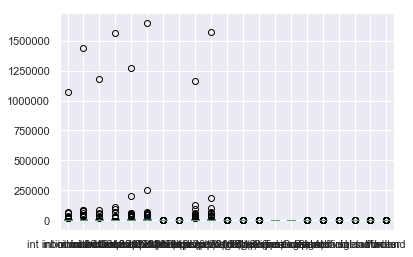

In [15]:
dados_completos.boxplot()

In [16]:
dados_completos['int inbound 2018']

Country
Albania                   534.0
Argentina                6942.0
Armenia                  1652.0
Australia                9246.0
Austria                 30816.0
Azerbaijan               2633.0
Belarus                 11502.0
Belgium                  9119.0
Bolivia                  1142.0
Brazil                   6621.0
Bulgaria                 9273.0
Cambodia                 6201.0
Canada                  21134.0
Chile                    5723.0
Colombia                 3904.0
Costa Rica               3017.0
Croatia                 16645.0
Cyprus                   3939.0
Czech Republic          10611.0
Denmark                 12749.0
Dominican Republic       6569.0
Ecuador                  2535.0
El Salvador              1677.0
Estonia                  3234.0
Fiji                      870.0
Finland                  3224.0
France                  89322.0
Georgia                  4757.0
Germany                 38881.0
Greece                  30123.0
                        ...    


In [17]:
dados_completos

,int inbound 2012,int inbound 2018,int outbound 2012,int outbound 2018,inbound exp 2012 (millions),inbound exp 2018 (millions),inbound exp 2012 (percentage),inbound exp 2018 (percentage),outbound exp 2012 (millions),outbound exp 2018 (millions),...,outbound exp 2018 (percentage),Bare area,Cropland,Tree cover,Grassland,Shrubland,Sparse vegetation,Artificial surfaces,Inland water,Wetland
Country,,,,,,,,,,,,,,,,,,,,,
Albania,3156.0,534.0,3959.0,5415.0,1623.0,2306.0,45.6,48.2,1374.0,175.0,...,25.5,1.8,49.8,34.8,5.5,3.2,1.4,1.0,2.3,0.3
Argentina,6497.0,6942.0,7266.0,1113.0,5665.0,5999.0,6.0,7.8,8466.0,13092.0,...,15.1,4.8,23.4,13.1,3.0,33.7,16.9,0.2,1.5,3.3
Armenia,963.0,1652.0,965.0,1623.0,853.0,1237.0,29.2,26.3,874.0,1458.0,...,21.9,1.3,56.9,20.1,11.2,2.4,1.4,2.2,4.5,0.0
Australia,6032.0,9246.0,8212.0,11403.0,34137.0,47327.0,10.9,14.5,35226.0,42351.0,...,13.7,4.4,8.2,11.6,15.8,21.7,36.6,0.2,0.3,1.3
Austria,24151.0,30816.0,1096.0,11883.0,18931.0,25411.0,8.7,10.0,9987.0,14256.0,...,6.0,2.8,23.0,53.8,15.2,0.0,1.4,2.8,0.8,0.2
Azerbaijan,1986.0,2633.0,2829.0,3919.0,2634.0,283.0,7.2,11.1,2617.0,2453.0,...,13.9,2.4,31.2,6.4,2.3,3.3,5.1,0.8,48.5,0.0
Belarus,613.0,11502.0,493.0,836.0,986.0,1221.0,1.9,2.9,948.0,1159.0,...,2.8,0.0,52.7,43.4,1.7,0.0,0.0,0.9,1.1,0.2
Belgium,756.0,9119.0,9576.0,13098.0,13704.0,10381.0,3.4,2.3,22357.0,2083.0,...,4.6,0.0,50.8,22.3,14.8,0.0,0.0,11.2,0.6,0.3
Bolivia,798.0,1142.0,788.0,106.0,631.0,970.0,5.1,9.4,502.0,1081.0,...,8.7,8.1,7.2,56.4,9.3,8.6,6.4,0.1,1.2,2.7


In [18]:
results = regress(X,Y)
results.summary()

C:\Users\AnnaBeatriz\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       int inbound 2018   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     981.4
Date:                Wed, 10 Jun 2020   Prob (F-statistic):           6.46e-66
Time:                        20:55:14   Log-Likelihood:                -829.01
No. Observations:                  79   AIC:                             1700.
Df Residuals:                      58   BIC:                             1750.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                            2.547e+06   1.85e+06      1.377      0.174   -1.15e+06    6.25e+06
int inbound 2012                    0.4871      0.210      2.320      0.024       0.067       0.907
int outbound 2012                   1.4207      0.398      3.571      0.001       0.624       2.217
int outbound 2018                  -0.3346      0.332     -1.007      0.318      -1.000       0.331
inbound exp 2012  (millions)        0.5497      0.200      2.750      0.008       0.150       0.950
inbound exp 2018  (millions)        0.3426      0.105      3.253      0.002       0.132       0.553
inbound exp 2012  (percentage)   -132.5719    355.123     -0.373      0.710    -843.427     578.283
inbound exp 2018  (percentage)     61.2125    339.496      0.180      0.858    -618.362     740.787
outbound exp 2012  (millions)       0.3460      0.268      1.293      0.201      -0.190       0.882
outbound exp 2018  (millions)      -1.2045      0.288     -4.176      0.000      -1.782      -0.627
outbound exp 2012  (percentage)   873.4132    970.828      0.900      0.372   -1069.911    2816.737
outbound exp 2018  (percentage)  -808.0919    810.630     -0.997      0.323   -2430.744     814.561
Bare area                        -2.55e+04   1.85e+04     -1.378      0.174   -6.25e+04    1.15e+04
Cropland                        -2.538e+04   1.85e+04     -1.373      0.175   -6.24e+04    1.16e+04
Tree cover                      -2.546e+04   1.85e+04     -1.377      0.174   -6.25e+04    1.16e+04
Grassland                       -2.547e+04   1.85e+04     -1.377      0.174   -6.25e+04    1.16e+04
Shrubland                       -2.544e+04   1.85e+04     -1.373      0.175   -6.25e+04    1.17e+04
Sparse vegetation               -2.544e+04   1.85e+04     -1.374      0.175   -6.25e+04    1.16e+04
Artificial surfaces             -2.551e+04   1.85e+04     -1.378      0.173   -6.26e+04    1.15e+04
Inland water                    -2.557e+04   1.85e+04     -1.382      0.172   -6.26e+04    1.15e+04
Wetland                         -2.521e+04   1.84e+04     -1.373      0.175    -6.2e+04    1.15e+04
==============================================================================
Omnibus:                       53.416   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              388.529
Skew:                           1.808   Prob(JB):                     4.29e-85
Kurtosis:                      13.245   Cond. No.                     6.65e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.65e+08. This might indicate that there are
strong multicollinearity o

In [19]:
X = dados_completos[['inbound exp 2012  (percentage)',
       'inbound exp 2018  (percentage)','outbound exp 2012  (percentage)',
       'outbound exp 2018  (percentage)', 'Bare area', 'Cropland',
       'Tree cover', 'Grassland', 'Shrubland', 'Sparse vegetation',
       'Artificial surfaces', 'Inland water', 'Wetland']]
Y = dados_completos['int inbound 2018']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=42)


results = regress(X_train,Y_train)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       int inbound 2018   R-squared:                       0.095
Model:                            OLS   Adj. R-squared:                 -0.145
Method:                 Least Squares   F-statistic:                    0.3962
Date:                Wed, 10 Jun 2020   Prob (F-statistic):              0.964
Time:                        20:55:15   Log-Likelihood:                -848.53
No. Observations:                  63   AIC:                             1725.
Df Residuals:                      49   BIC:                             1755.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                           -6.382e+07   3.46e+07     -1.845      0.071   -1.33e+08     5.7e+06
inbound exp 2012  (percentage)  -1554.6134   6851.924     -0.227      0.821   -1.53e+04    1.22e+04
inbound exp 2018  (percentage)    410.0848   6631.168      0.062      0.951   -1.29e+04    1.37e+04
outbound exp 2012  (percentage)  5284.0417   1.82e+04      0.290      0.773   -3.13e+04    4.19e+04
outbound exp 2018  (percentage) -6255.2516   1.53e+04     -0.410      0.684   -3.69e+04    2.44e+04
Bare area                        6.399e+05   3.46e+05      1.848      0.071   -5.59e+04    1.34e+06
Cropland                         6.383e+05   3.46e+05      1.846      0.071   -5.66e+04    1.33e+06
Tree cover                       6.387e+05   3.46e+05      1.847      0.071   -5.64e+04    1.33e+06
Grassland                        6.395e+05   3.46e+05      1.848      0.071   -5.59e+04    1.33e+06
Shrubland                        6.428e+05   3.46e+05      1.855      0.070   -5.35e+04    1.34e+06
Sparse vegetation                6.388e+05   3.46e+05      1.847      0.071   -5.64e+04    1.33e+06
Artificial surfaces              6.381e+05   3.46e+05      1.843      0.071   -5.77e+04    1.33e+06
Inland water                     6.387e+05   3.46e+05      1.846      0.071   -5.65e+04    1.33e+06
Wetland                          6.318e+05   3.44e+05      1.835      0.073   -6.02e+04    1.32e+06
==============================================================================
Omnibus:                      126.809   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6443.637
Skew:                           6.694   Prob(JB):                         0.00
Kurtosis:                      50.702   Cond. No.                     8.07e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.07e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

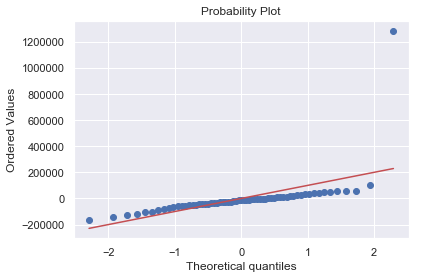

In [20]:
stats.probplot(results.resid,dist="norm",plot=plt);

In [21]:
X_const= sm.add_constant(X_test)
Y_pred= results.predict(X_const)

In [22]:
mean_squared_error(Y_test,Y_pred)

2963087932.57241

In [33]:
regressor = RandomForestRegressor(n_estimators = 200, random_state = 0,n_jobs=-1) 
regressor.fit(X_train, Y_train)



RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=-1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 <a list of 13 Text xticklabel objects>)

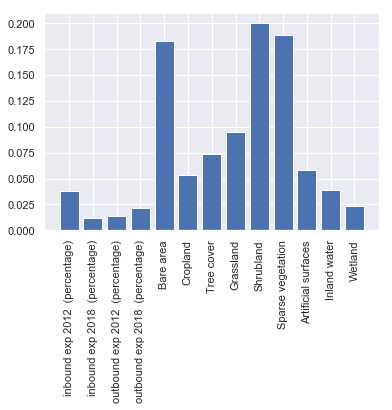

In [32]:
importance = regressor.feature_importances_
plt.bar(X_train.columns,importance)
plt.xticks(rotation=90)

In [24]:
Y_pred2=regressor.predict(X_test)
mean_squared_error(Y_test,Y_pred2)

976303201.975731

In [25]:
tree_regressor = DecisionTreeRegressor(random_state = 0)
tree_regressor.fit(X_train, Y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 <a list of 13 Text xticklabel objects>)

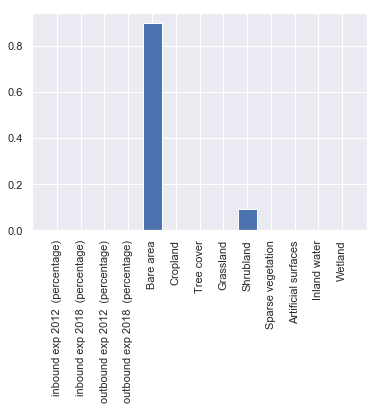

In [34]:
tree_importance = tree_regressor.feature_importances_
plt.bar(X_train.columns,tree_importance)
plt.xticks(rotation=90)


In [27]:
Y_pred_tree = tree_regressor.predict(X_test)
mean_squared_error(Y_test,Y_pred_tree)

841305327.25